In [1]:
from Controller import TrainingController_V2
from Utils.SaveUtils import load_parameters
from Parameters.TrainingParameters import TrainingParameters

In [2]:
######################## Resume training ########################
# folder_path = "./SavedModels/" + "0.7632_Diabetes_BaseNNModel_2021-05-13 04:25:57.514112"
# parameters_json = load_parameters(folder_path=folder_path)
# parameters = TrainingParameters(**parameters_json)
# parameters.load_model_folder_path = folder_path
# trainer = TrainingController_V2(parameters=parameters)

In [3]:
######################## Start a new Training ########################
parameters = TrainingParameters()
trainer = TrainingController_V2(parameters= parameters)


| Running on cuda:0  

| Preprocessed data loaded successfully: ./datasets/preprocessed/BPI_Challenge_2012/OW 
/home/jrhs/.pyenv/versions/dl/lib/python3.9/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


<Figure size 1600x800 with 0 Axes>

In [4]:
trainer.show_model_info()


| Model Structure 
BaselineLSTMModel_V2(
  (emb): Embedding(29, 32, padding_idx=0)
  (lstm): LSTM(32, 64, batch_first=True, dropout=0.1)
  (batchnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output_net): Sequential(
    (0): LeakyReLU(negative_slope=0.01, inplace=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): Linear(in_features=64, out_features=29, bias=True)
  )
)
| Loaded model has {28157} parameters 


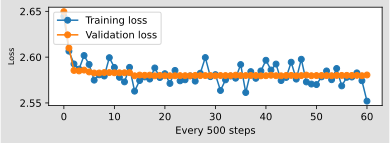

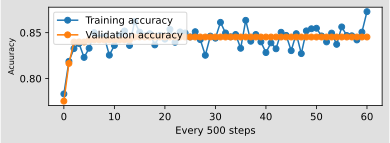

HEDULE                                                   0   
W_Nabellen offertes_START                                                      0   
W_Valideren aanvraag_COMPLETE                                                  0   
W_Valideren aanvraag_SCHEDULE                                                  0   
W_Valideren aanvraag_START                                                   159   
W_Wijzigen contractgegevens_SCHEDULE                                           0   
<PAD>                                                                          0   

                                         W_Nabellen incomplete dossiers_START  \
<EOS>                                                                       0   
<SOS>                                                                       0   
O_ACCEPTED_COMPLETE                                                         0   
O_CANCELLED_COMPLETE                                                        0   
O_CREATED_COMPLETE          

In [5]:
trainer.train()

In [6]:
trainer.save_training_result("training_v2.ipynb")


| Model saved successfully to: ./SavedModels/0.8493_BPI2012_BaseLineLSTMModel_2021-05-20 17:16:26.933094  


<Figure size 432x288 with 0 Axes>

In [7]:
# 0.8591_BPI2012_BaseLineLSTMModel_2021-05-13 04:01:28.647044
# 0.7632_Diabetes_BaseNNModel_2021-05-13 04:25:57.514112

In [8]:
# Get some example from the test set, to see why the accuracy is still low on the A only dataset.

In [9]:
testing_full_trace = trainer.test_dataset[16]["trace"]

In [10]:
testing_trace = testing_full_trace[:3]

In [11]:
testing_vocab_trace = trainer.model.vocab.list_of_index_to_vocab(testing_trace)

In [12]:
trainer.model.vocab.list_of_index_to_vocab(testing_full_trace)

['<SOS>',
 'W_Afhandelen leads_SCHEDULE',
 'W_Afhandelen leads_START',
 'W_Afhandelen leads_COMPLETE',
 '<EOS>']

In [13]:
testing_vocab_trace

['<SOS>', 'W_Afhandelen leads_SCHEDULE', 'W_Afhandelen leads_START']

In [14]:
trainer.model.predicting_from_list_of_vacab_trace([testing_vocab_trace], n_steps=5, use_argmax=True)

[['<SOS>',
  'W_Afhandelen leads_SCHEDULE',
  'W_Afhandelen leads_START',
  'W_Completeren aanvraag_SCHEDULE',
  'W_Afhandelen leads_COMPLETE',
  'W_Completeren aanvraag_START',
  'W_Completeren aanvraag_COMPLETE',
  'W_Completeren aanvraag_START']]